# <center> Diabetes Prediction Using Supervised Machine Learning

#### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Loading Dataset

In [5]:
diabetes_data = pd.read_csv("diabetes_prediction_dataset.csv")
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### Conducting EDA

In [6]:
diabetes_data.shape

(100000, 9)

In [7]:
diabetes_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
diabetes_data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [10]:
diabetes_data.groupby('gender')['diabetes'].sum()

gender
Female    4461
Male      4039
Other        0
Name: diabetes, dtype: int64

In [11]:
diabetes_data['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [12]:
diabetes_data['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

#### Visualizating Data

##### Setting Graph style

In [74]:
sns.set_style('darkgrid') #darkgrid, whitegrid, dark, white, ticks
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (5, 3)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

<AxesSubplot:xlabel='diabetes', ylabel='count'>

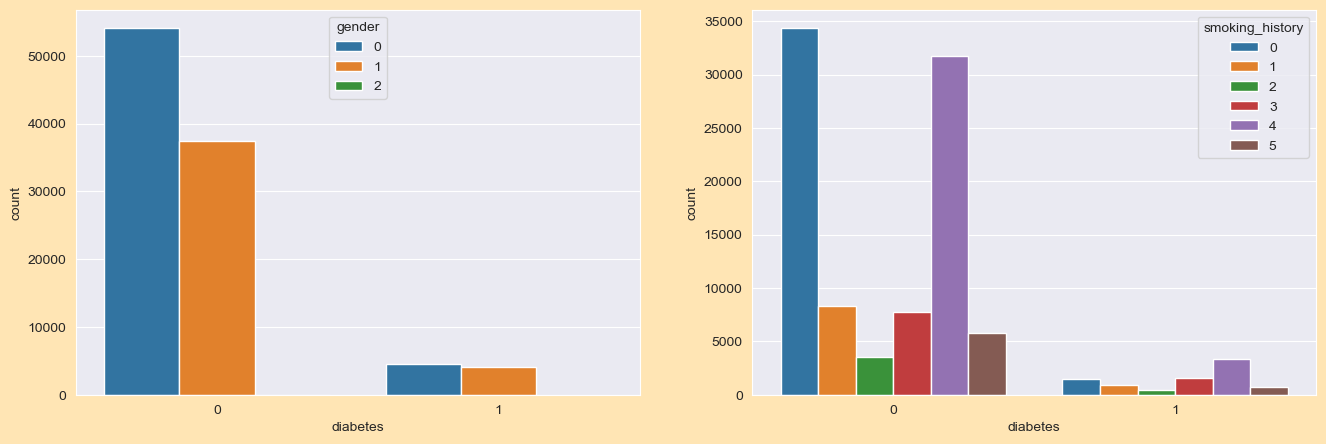

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x = "diabetes", data=diabetes_data, hue="gender", ax=axes[0])
sns.countplot(x = "diabetes", data=diabetes_data, hue="smoking_history", ax=axes[1])

<AxesSubplot:xlabel='diabetes', ylabel='Density'>

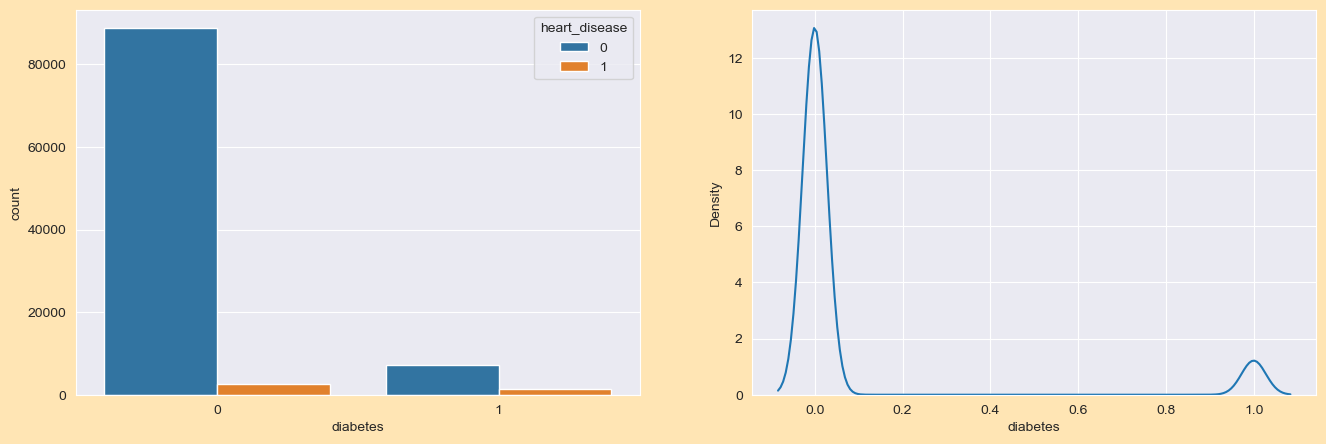

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x = "diabetes", data=diabetes_data, hue="heart_disease", ax=axes[0])
sns.kdeplot(diabetes_data['diabetes'], ax=axes[1])

<AxesSubplot:>

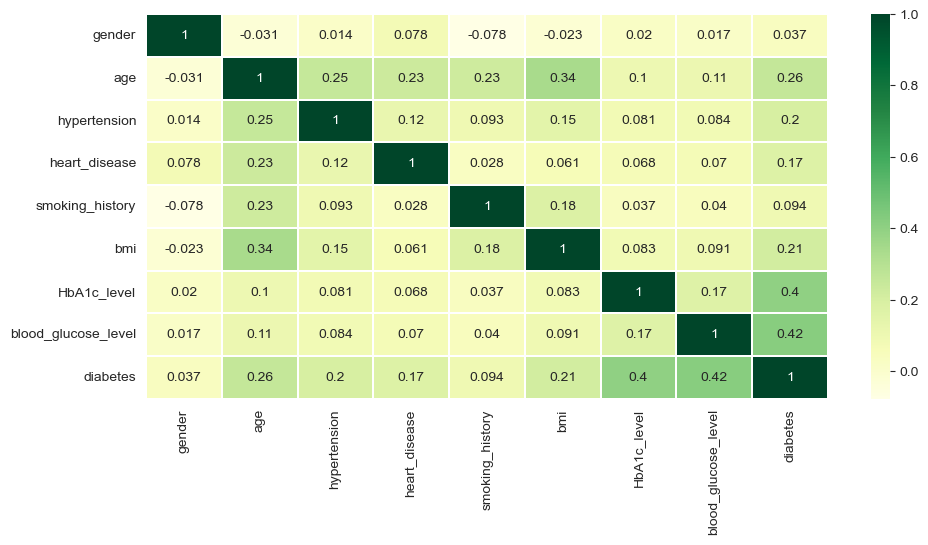

In [81]:
plt.rcParams['figure.figsize'] = (11,5)
plt.rcParams['figure.facecolor'] = '#FFFFFF'
sns.heatmap(diabetes_data.corr(), annot=True, cmap="YlGn", lw=0.01)

#### Importing Machine Learning Libabries

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### Convert Categorical Data into Numerical

In [20]:
diabetes_data['gender'].replace({'Female':0, 'Male':1, 'Other':2}, inplace=True)
diabetes_data['smoking_history'].replace({'No Info':0, 'current':1, 'ever':2, 'former':3, 'never':4, 'not current':5}, inplace=True)
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


#### Dividing data into dependent and independent features

In [21]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

#### Dividing data into training and testing set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#### Feature Scaling

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [25]:
# predicating 
y_predLR = log_reg.predict(X_test)

<Figure size 200x200 with 0 Axes>

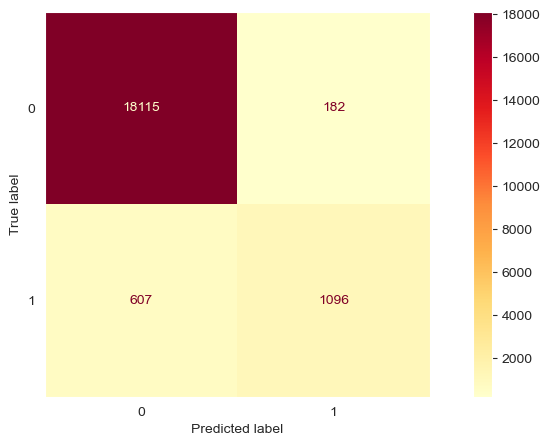

In [26]:
# Confusion Metrix
cm = metrics.confusion_matrix(y_test, y_predLR)

cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

plt.figure(figsize=(2,2))
cm_disp.plot(cmap="YlOrRd")
plt.grid()

In [27]:
# Accuracy
acc_LR = metrics.accuracy_score(y_test, y_predLR)
acc_LR

0.96055

In [28]:
precision_LR = metrics.precision_score(y_test, y_predLR).round(3)
recall_LR = metrics.recall_score(y_test, y_predLR).round(3)
f1score_LR = metrics.f1_score(y_test, y_predLR).round(3)

print(f"Precision: {precision_LR}")
print(f"Recall: {recall_LR}")
print(f"f1-Score: {f1score_LR}")

Precision: 0.858
Recall: 0.644
f1-Score: 0.735


In [29]:
print(metrics.classification_report(y_test, y_predLR))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.86      0.64      0.74      1703

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [30]:
fpr_LR, tpr_LR, thres_LR = metrics.roc_curve(y_test, y_predLR)
ROC_Score_LR = metrics.roc_auc_score(y_test, y_predLR)
ROC_Score_LR

0.8168115922215267

### KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
# predicating 
y_predKNN = knn.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<Figure size 200x200 with 0 Axes>

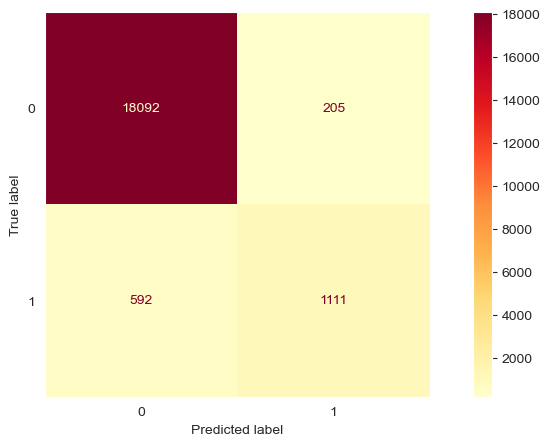

In [33]:
# Confusion Metrix
cm = metrics.confusion_matrix(y_test, y_predKNN)

cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

plt.figure(figsize=(2,2))
cm_disp.plot(cmap="YlOrRd")
plt.grid()

In [34]:
# Accuracy
acc_KNN = metrics.accuracy_score(y_test, y_predKNN)
acc_KNN

0.96015

In [35]:
precision_KNN = metrics.precision_score(y_test, y_predKNN).round(3)
recall_KNN = metrics.recall_score(y_test, y_predKNN).round(3)
f1score_KNN = metrics.f1_score(y_test, y_predKNN).round(3)

print(f"Precision: {precision_KNN}")
print(f"Recall: {recall_KNN}")
print(f"f1-Score: {f1score_KNN}")

Precision: 0.844
Recall: 0.652
f1-Score: 0.736


In [36]:
print(metrics.classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.84      0.65      0.74      1703

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [37]:
fpr_KNN, tpr_KNN, thres_KNN = metrics.roc_curve(y_test, y_predKNN)
ROC_Score_KNN = metrics.roc_auc_score(y_test, y_predKNN)
ROC_Score_KNN

0.8205870668387987

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [39]:
# predicating 
y_predDT = decision_tree.predict(X_test)

<Figure size 200x200 with 0 Axes>

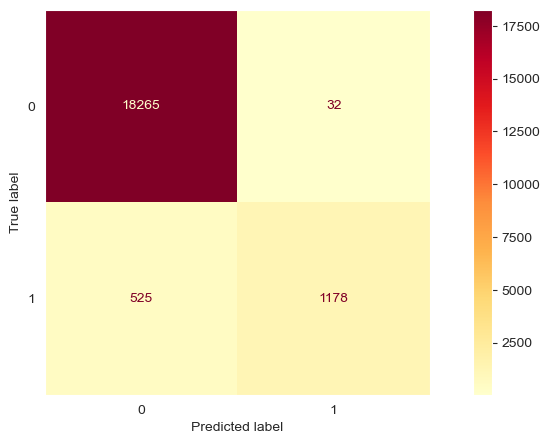

In [40]:
# Confusion Metrix
cm = metrics.confusion_matrix(y_test, y_predDT)

cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)

plt.figure(figsize=(2,2))
cm_disp.plot(cmap="YlOrRd")
plt.grid()

In [41]:
# Accuracy
acc_DT = metrics.accuracy_score(y_test, y_predDT)
acc_DT

0.97215

In [42]:
precision_DT = metrics.precision_score(y_test, y_predDT).round(3)
recall_DT = metrics.recall_score(y_test, y_predDT).round(3)
f1score_DT = metrics.f1_score(y_test, y_predDT).round(3)

print(f"Precision: {precision_DT}")
print(f"Recall: {recall_DT}")
print(f"f1-Score: {f1score_DT}")

Precision: 0.974
Recall: 0.692
f1-Score: 0.809


In [43]:
print(metrics.classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.97      0.69      0.81      1703

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [44]:
fpr_DT, tpr_DT, thres_DT = metrics.roc_curve(y_test, y_predDT)
ROC_Score_DT = metrics.roc_auc_score(y_test, y_predDT)
ROC_Score_DT

0.8449857863295681

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=10).fit(X_train, y_train)

In [46]:
# predicating 
y_predRF = RF.predict(X_test)

<Figure size 200x200 with 0 Axes>

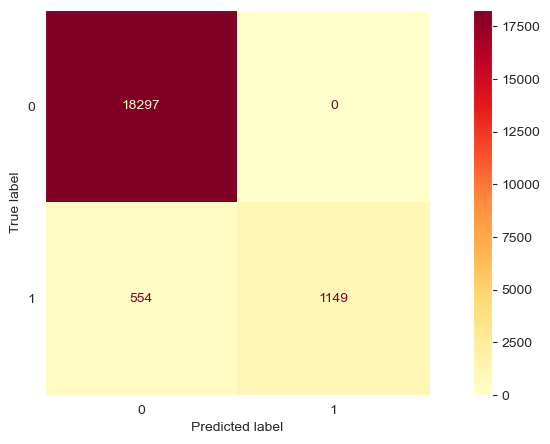

In [47]:
# Confusion Metrix
cm = metrics.confusion_matrix(y_test, y_predRF)

cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)

plt.figure(figsize=(2,2))
cm_disp.plot(cmap="YlOrRd")
plt.grid()

In [48]:
# Accuracy
acc_RF = metrics.accuracy_score(y_test, y_predRF)
acc_RF

0.9723

In [49]:
precision_RF = metrics.precision_score(y_test, y_predRF).round(3)
recall_RF = metrics.recall_score(y_test, y_predRF).round(3)
f1score_RF = metrics.f1_score(y_test, y_predRF).round(3)

print(f"Precision: {precision_RF}")
print(f"Recall: {recall_RF}")
print(f"f1-Score: {f1score_RF}")

Precision: 1.0
Recall: 0.675
f1-Score: 0.806


In [50]:
print(metrics.classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18297
           1       1.00      0.67      0.81      1703

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [51]:
fpr_RF, tpr_RF, thres_RF = metrics.roc_curve(y_test, y_predRF)
ROC_Score_RF = metrics.roc_auc_score(y_test, y_predRF)
ROC_Score_RF

0.8373458602466236

### SVM

In [52]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')  #kernel = linear, rbf
svm.fit(X_train, y_train)

SVC()

In [53]:
# predicating 
y_predSVM = svm.predict(X_test)

<Figure size 200x200 with 0 Axes>

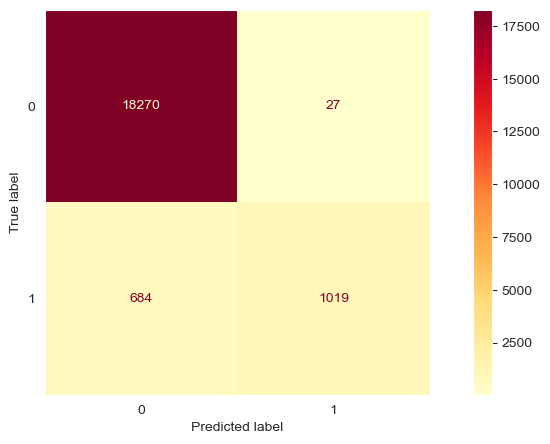

In [54]:
# Confusion Metrix
cm = metrics.confusion_matrix(y_test, y_predSVM)

cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)

plt.figure(figsize=(2,2))
cm_disp.plot(cmap="YlOrRd")
plt.grid()

In [55]:
# Accuracy
acc_SVM = metrics.accuracy_score(y_test, y_predSVM)
acc_SVM

0.96445

In [56]:
precision_SVM = metrics.precision_score(y_test, y_predSVM).round(3)
recall_SVM = metrics.recall_score(y_test, y_predSVM).round(3)
f1score_SVM = metrics.f1_score(y_test, y_predSVM).round(3)

print(f"Precision: {precision_SVM}")
print(f"Recall: {recall_SVM}")
print(f"f1-Score: {f1score_SVM}")

Precision: 0.974
Recall: 0.598
f1-Score: 0.741


In [57]:
print(metrics.classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18297
           1       0.97      0.60      0.74      1703

    accuracy                           0.96     20000
   macro avg       0.97      0.80      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [58]:
fpr_SVM, tpr_SVM, thres_SVM = metrics.roc_curve(y_test, y_predSVM)
ROC_Score_SVM = metrics.roc_auc_score(y_test, y_predSVM)
ROC_Score_SVM

0.7984400954422318

## Conclusion

In [59]:
data = [
    [acc_LR, precision_LR, recall_LR, f1score_LR],
    [acc_KNN, precision_KNN, recall_KNN, f1score_KNN],
    [acc_SVM, precision_SVM, recall_SVM, f1score_SVM],
    [acc_DT, precision_DT, recall_DT, f1score_LR],
    [acc_RF, precision_RF, recall_RF, f1score_RF],
]

pd.DataFrame(data=data, index=['Logistic Regression', "KNN", "SVM", "Decision Tree", "Fandom Forest"], columns=["Accuracy", "Precision", "Recall", "F1-Score"])

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.96055,0.858,0.644,0.735
KNN,0.96015,0.844,0.652,0.736
SVM,0.96445,0.974,0.598,0.741
Decision Tree,0.97215,0.974,0.692,0.735
Fandom Forest,0.97230,1.000,0.675,0.806


In [60]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)

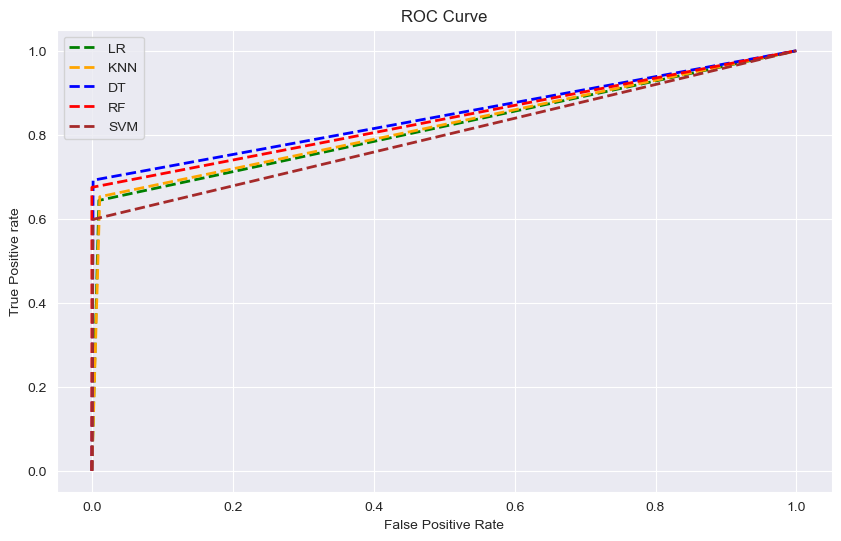

In [63]:
plt.figure(figsize=(10,6))

plt.plot(fpr_LR, tpr_LR, ls='--', lw=2, c='green', label='LR')
plt.plot(fpr_KNN, tpr_KNN, ls='--', lw=2, c='orange', label='KNN')
plt.plot(fpr_DT, tpr_DT, ls='--', lw=2, c='blue', label='DT')
plt.plot(fpr_RF, tpr_RF, ls='--', lw=2, c='red', label='RF')
plt.plot(fpr_SVM, tpr_SVM, ls='--', lw=2, c='brown', label='SVM')

plt.legend(loc='best')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig('ROC',dpi=300)

In [62]:
data = [
    [acc_LR, precision_LR, recall_LR, f1score_LR, ROC_Score_LR],
    [acc_KNN, precision_KNN, recall_KNN, f1score_KNN, ROC_Score_KNN],
    [acc_SVM, precision_SVM, recall_SVM, f1score_SVM, ROC_Score_SVM],
    [acc_DT, precision_DT, recall_DT, f1score_DT, ROC_Score_DT],
    [acc_RF, precision_RF, recall_RF, f1score_RF, ROC_Score_RF],
]

pd.DataFrame(data=data, index=['Logistic Regression', "KNN", "SVM", "Decision Tree", "Fandom Forest"], 
             columns=["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC Score"])

,Accuracy,Precision,Recall,F1-Score,ROC AUC Score
Logistic Regression,0.96055,0.858,0.644,0.735,0.816812
KNN,0.96015,0.844,0.652,0.736,0.820587
SVM,0.96445,0.974,0.598,0.741,0.798440
Decision Tree,0.97215,0.974,0.692,0.809,0.844986
Fandom Forest,0.97230,1.000,0.675,0.806,0.837346
